<a href="https://colab.research.google.com/github/FrankArcosAnselmo/mI_lab01_Fa/blob/develop/LAB05_HINOSTROZA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB05: MODELOS DE APRENDIZAJE AUTOMÁTICO. MODELOS DE APRENDIZAJE  PROFUNDO


# Preparación del entorno

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Paso 1: Cargar el dataset y preparar columnas

In [ ]:
# Definimos los nombres de las columnas
column_names = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_Cell_Size',
                'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
                'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

# Cargar el dataset desde la URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df = pd.read_csv(url, names=column_names)

# Reemplazar los signos de interrogación con NaN y convertir a float
df.replace('?', np.nan, inplace=True)
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('float')

# Eliminamos filas con valores faltantes
df.dropna(inplace=True)

# Convertir todo a tipo numérico
df = df.astype(float)

# Mostrar una vista previa
df.head()


,Sample_code_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


# Paso 2: Análisis descriptivo

In [ ]:
# Separar variables numéricas (todas son numéricas excepto el código y clase)
numerical_data = df.drop(columns=['Sample_code_number', 'Class'])

# Estadísticos descriptivos
desc_stats = numerical_data.describe()
print(desc_stats)

# Matriz de correlación
correlation_matrix = numerical_data.corr()
print(correlation_matrix)


       Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count       683.000000            683.000000             683.000000   
mean          4.442167              3.150805               3.215227   
std           2.820761              3.065145               2.988581   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count         683.000000                   683.000000   683.000000   
mean            2.830161                     3.234261     3.544656   
std             2.864562                     2.223085     3.643857   
min             1.000000                     1.000000     1.000000   
25%       

# Paso 3: Visualizaciones con Matplotlib y Seaborn

Histogramas

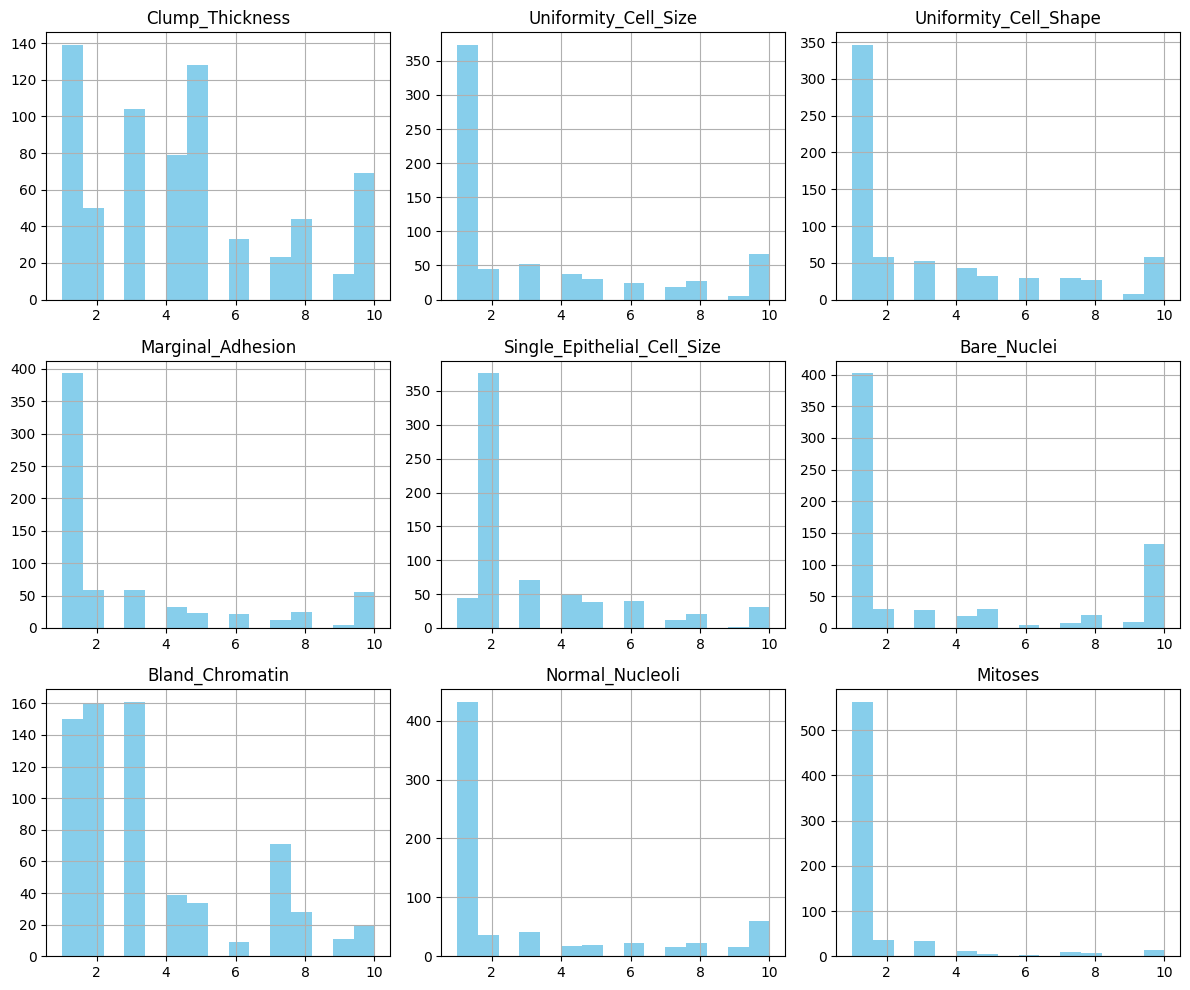

In [ ]:
numerical_data.hist(bins=15, figsize=(12, 10), color='skyblue')
plt.tight_layout()
plt.show()


Gráficos de densidad

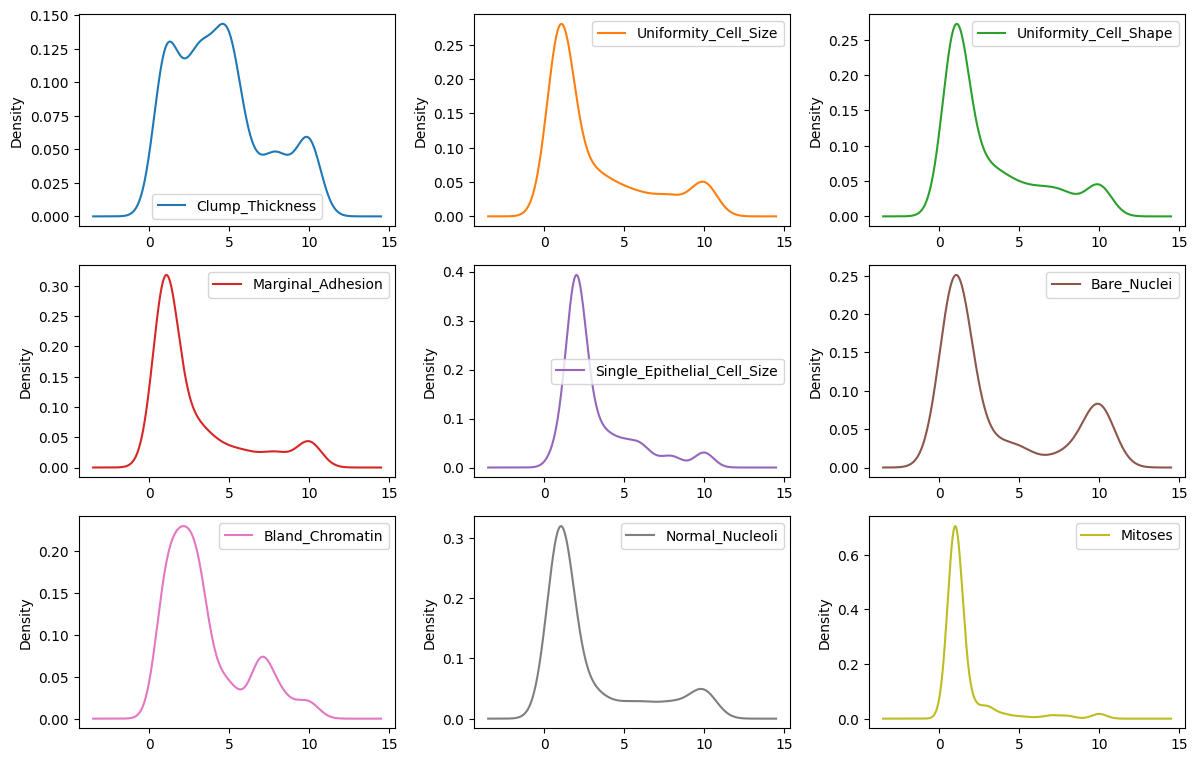

In [ ]:
numerical_data.plot(kind='density', subplots=True, layout=(4,3), sharex=False, figsize=(12,10))
plt.tight_layout()
plt.show()


Boxplots

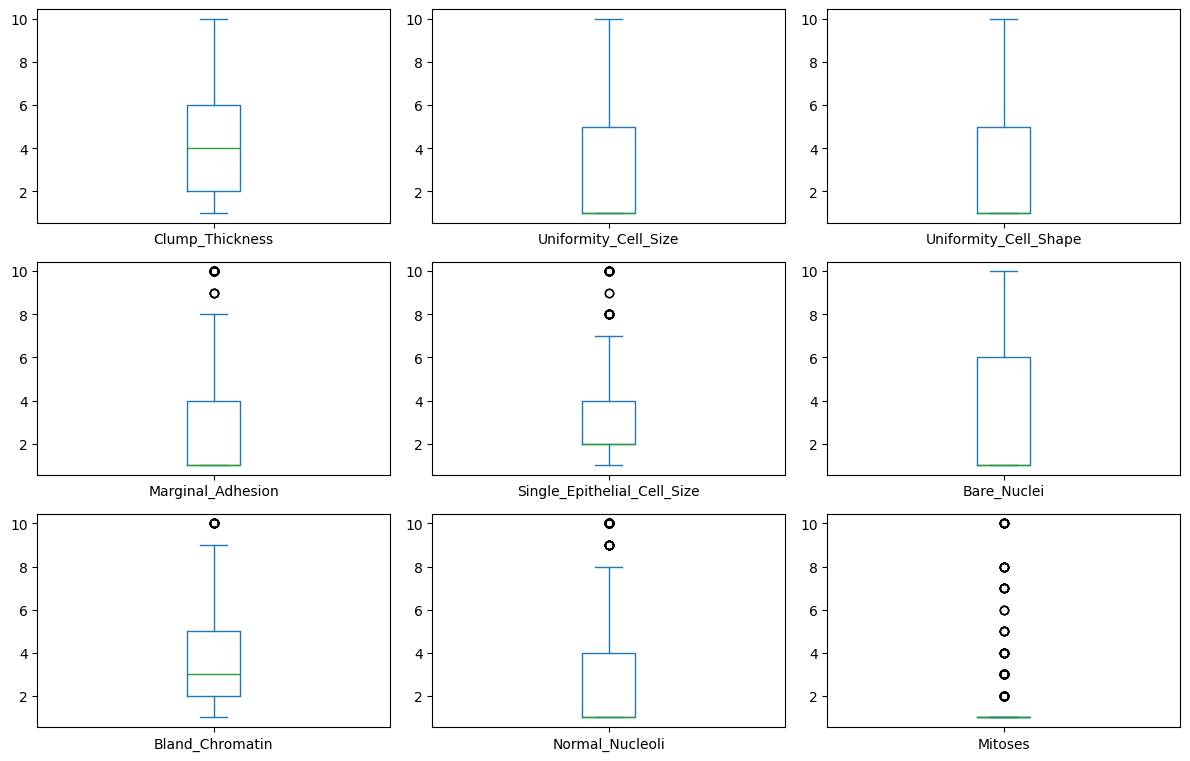

In [ ]:
numerical_data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(12,10))
plt.tight_layout()
plt.show()


Diagramas de dispersión

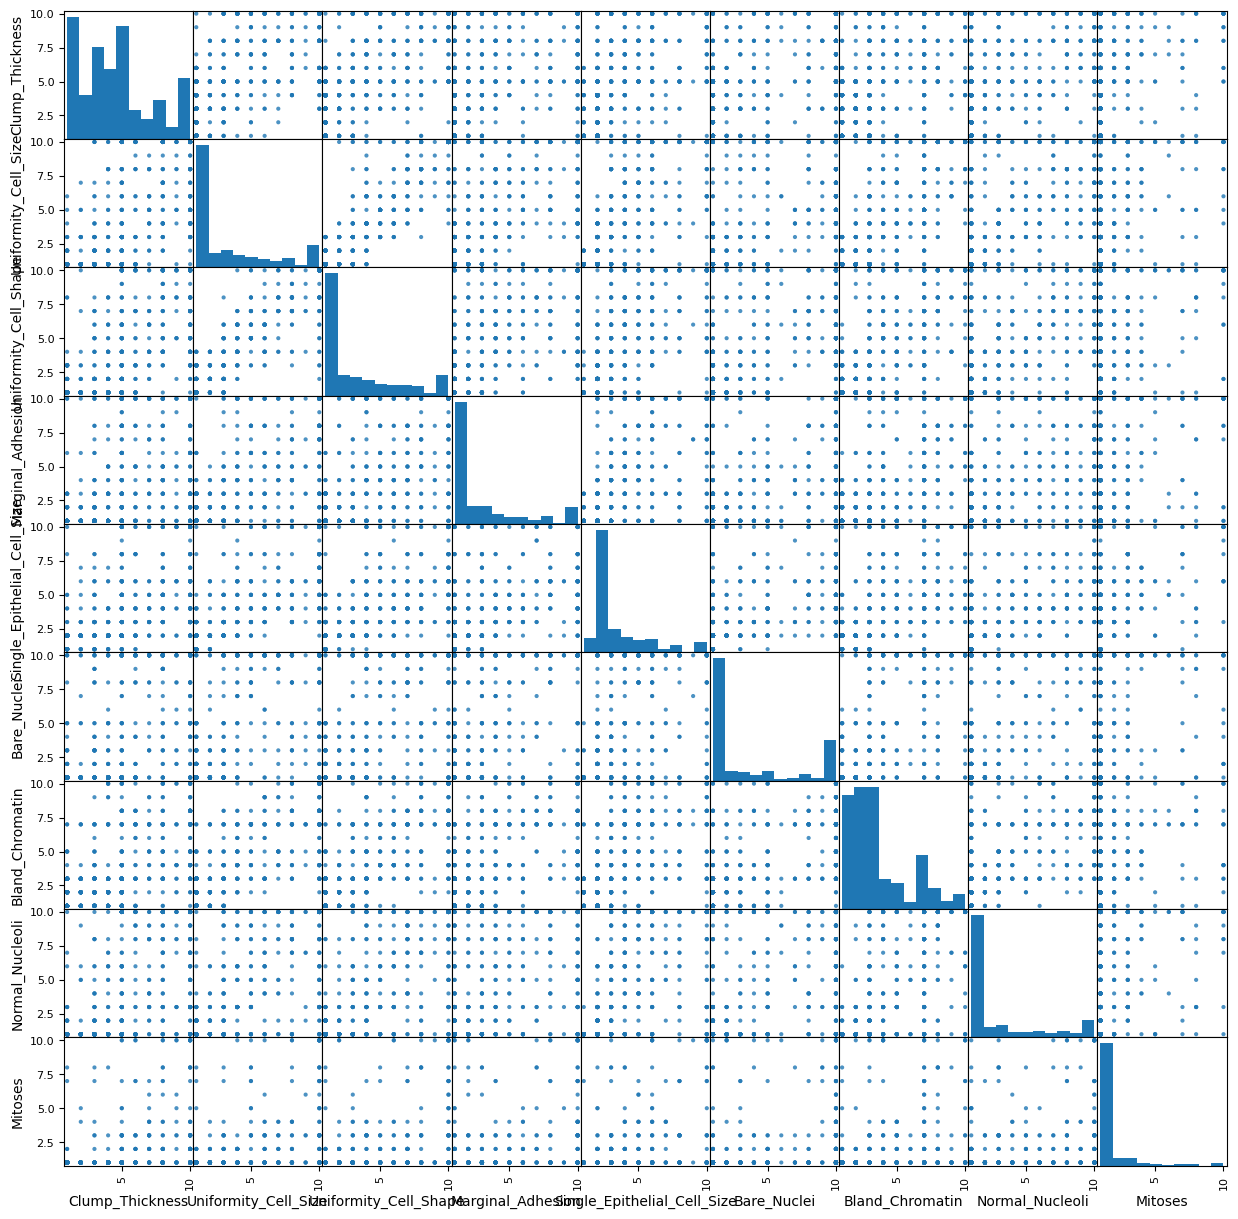

In [ ]:
scatter_matrix(numerical_data, figsize=(15, 15), alpha=0.8, diagonal='hist')
plt.show()


Mapa de calor de correlación

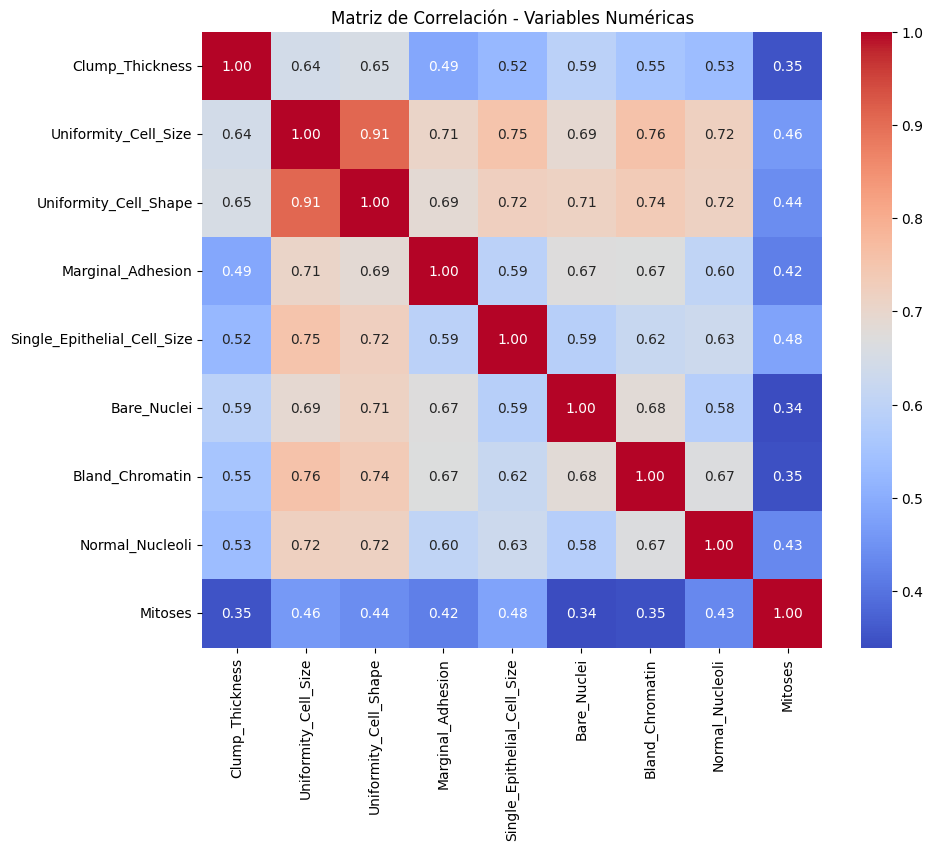

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()


# Paso 4: Modelo k-NN con Scikit-learn

Separar datos en entrenamiento y prueba

In [ ]:
X = df.drop(columns=['Sample_code_number', 'Class'])
y = df['Class']

# División del conjunto: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Modelo k-NN

In [ ]:
# Creamos el modelo con k = 5 (puedes probar otros valores)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

Predicciones y precisión

In [ ]:
# Predicciones
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Precisión del modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Precisión en entrenamiento: {train_accuracy:.2f}')
print(f'Precisión en prueba: {test_accuracy:.2f}')


Precisión en entrenamiento: 0.98
Precisión en prueba: 0.96
